In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import protfasta
import metapredict as meta
import warnings
warnings.filterwarnings('ignore')

In [80]:
AD = "DMRT1.fasta"
AD_conservation = pd.read_csv("../data/zoonomia_toga_mca/property_entropy/" + AD, sep = "\t", header = 1)
AD_conservation

# align_column_number        score  \
0                        0     0.803191   
1                        1     0.770664   
2                        2     0.803190   
3                        3 -1000.000000   
4                        4     0.749682   
..                     ...          ...   
560                    560 -1000.000000   
561                    561 -1000.000000   
562                    562 -1000.000000   
563                    563 -1000.000000   
564                    564 -1000.000000   

                                                column  
0    MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...  
1    PPPPPPPPPPPPPPPPPPPPPPPPSPPPPPPPPPPPPPPPPPPPPP...  
2    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...  
3    ----------------------------------------------...  
4    DDDDDDDDDDDDDEDDDDDDDDDDDDDDDDDDDDDDDDDEEDEEDD...  
..                                                 ...  
560  --------------------N-------------------------...  
561  --------------------E-------------------------...  
562  ----------------------------------------------...  
563  ----------------------------------------------...  
564  ----------------------------------------------...  

[565 rows x 3 columns]

In [83]:
AD_alignment = protfasta.read_fasta("../data/zoonomia_toga_mca/prot_alignments/" + AD, invalid_sequence_action = 'ignore')
ref_seq = AD_alignment["REFERENCE"]
ref_seq

'MPN-DEAFSKPSTPS-EAPH-APG-VPPQGRA--------------GGF-GKASGALV--GAA-----S-GSS-A-GG-S-----------S-----RG----G--GSG------------SGASDLG------AGS-KKSPRLPKCARCRNHGYASPLKGHKRFCMWRDCQC----------KKCNLIAERQRVMAAQVALRRQQAQEEELGISHPIPLPSAAELLVKRENNGS------NPCLMTE---CSG-TSQ---PPP-----------ASVP------TTAA--SEG------RMVIQDIPAVTSRGHVENTPDLVSDSTYYSSFY-QPSLFPYYNNLYNC-PQYSMALAAD-SASGEVGNPLGGSPVKNSLRGLPGPYVPGQ-------TGNQW-QMKNMENRH-AMSSQYRMHSYY----------------PPPSY-LGQSVPQFFTFEDAPSYPEARASVFSP-------------------PSSQDSGLVSLSSSSPISN--KSTKAVL--ECEPA-SEPSSF-T------VTPVI-----EEDE--------'

In [85]:
AD_alignment

{'vs_HLbosInd2\tENST00000382276.DMRT1.25': 'MPN-DDAYSKPSAPS-EAPQ-TPG-APPQGKA--------------------------------------------GG-G-----------G-----GG----S--GSD------------SGASGTG------AVSGKKSPRLPKCARCRNHGYASPLKGHKRFCMWRDCQC----------KKCNLIAERQRVMAAQVALRRQQAQEEELGISHPIPLPSTAELMVKRENSSG------NPCLMIE---SSS-SSQ---PPP-----------ASTP------STAAPGPEG------RMVIQDIPAVTSRGHVENTPDLVSDSTYYSSFY-QPSLFPYYNNLYNY-PQYPMALAAD-SSSGDVGNPLGGSPVKNSLRSLPAPYVPGQ-------TGNQWQQMKNSENRH-AVSSQYRMHSYY----------------PPPSY-LGQSMSQIFTFEDSASYSEAKA------------------------------------------------------------------------------------------------',
 'vs_HLbosGau1\tENST00000382276.DMRT1.14': 'MPN-DDAYSKPSAPS-EAPQ-PPG-APPQGKA--------------------------------------------GG-G-----------G-----GG----S--GSD------------SGASGTG------AVSGKKSPRLPKCARCRNHGYASPLKGHKRFCMWRDCQC----------KKCNLIAERQRVMAAQVALRRQQAQEEELGISHPIPLPSTAELMVKRENSSG------NPCLMIE---SSS-SSQ---PPP-----------ASTP------STAAPGPEG------RMVIQDIPAVTSRGHVENTPDLVSDSTYYSSFY-QPSLFPYYNN

In [84]:
meta.predict_disorder(ref_seq)

ValueError: Invalid amino acid detected: -

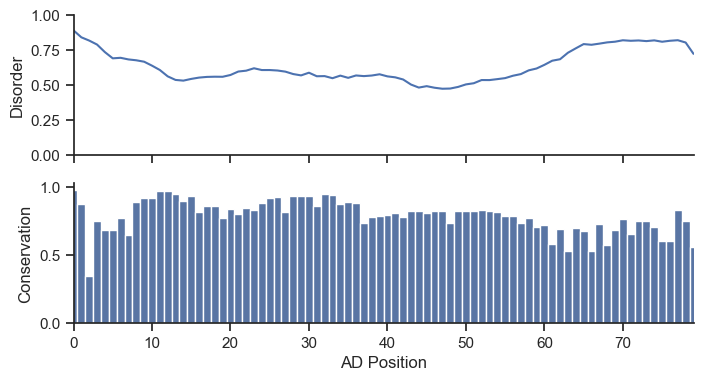

In [78]:
sns.set_theme(rc={'figure.figsize':(8, 2)})
sns.set_style('ticks')

fig, axs = plt.subplots(2,1, figsize=(8, 4))
ax1, ax2= axs

max_x = max(AD_conservation["# align_column_number"])

sns.lineplot(x = np.arange(len(ref_seq)), y = meta.predict_disorder(ref_seq), ax = ax1)
ax1.set_ylabel("Disorder")
ax1.set_xlim(0, max_x)
ax1.set_xticklabels([])
ax1.set_ylim(0, 1)

sns.barplot(data = AD_conservation, x = "# align_column_number", y = "score", width = 1, ax = ax2)
ax2.set_xticks(np.arange(0,  max_x + 10, 10))
plt.xlim(0, max_x)

plt.xlabel("AD Position")
plt.ylabel("Conservation")

sns.despine()